# <font color=green size="8"><center> M5 Forecasting - Accuracy</center></font>

# <font color = 'blue'>1. Business Problem </font>
## 1.1 Description/Overview

Nowadays, time-series forecasting is one of the essential area in Machine Learning that is more often used by all e-commerce company as well as many retail company like Walmart. This M5 forecasting challenge, is the fifth iteration competition organised by Makridakis Open Forecasting Center (MOFC) at the University of Nicosia. MOFC conducts cutting-edge forecasting research and provides business forecast training. It helps companies achieve accurate predictions, estimate the levels of uncertainty, avoiding costly mistakes, and apply best forecasting practices. The MOFC is well known for its Makridakis Competitions, the first of which ran in the 1980s. <br><br>

By using hierarchical sales data from Walmart, the world’s largest company by revenue, to forecast daily sales for the next 28 days. The data, covers stores in three US States (California, Texas, and Wisconsin) and includes item level, department, product categories, and store details. In addition, it has explanatory variables such as price, promotions, day of the week, and special events. 

This timeseries problem is picked from [kaggle](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).


## 1.2 Some useful links:
1. Data source: https://www.kaggle.com/c/m5-forecasting-accuracy/data
2. Underatanding more about data: https://www.kaggle.com/headsortails/back-to-predict-the-future-interactive-m5-eda
3. Top discussion from cometition page: https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/163414
https://www.kaggle.com/raenish/cheatsheet-date-helpers

## 1.3 Real World/ Business Objective and Constraints
1. To provide 28 days ahead point forecasts (PFs) for all the series of the competition as acurately as possible.
2. Incorrect sales prediction may lead to either understocking or overstocking of items.
3. No strict latency constraints.

# <font color= 'blue'>2. Mapping the real-world problem to a Machine Learning Problem </font>
## 2.1 Problem Statement

Given past 5.4 years(1913 days) of sales data for each item at each store at various location, **we need to predict sales  for two 28-day time periods**. 1st 28 days time period is from day 1914 to day 1941. 2nd 28 days time series is from day 1942 to day 1969. 

## 2.2 Type of Machine Learning problem
This forecasting problem is a multi-step time series forecasting i.e given data from time step 1 to time step $t$, we will do prediction from time step $t+1$ to time step $t+n$.<br>
To solve this forecasting challenge, it can be easily posed as a regression problem, that we will see in modelling part. 

## 2.3 Performance Metrics 
The accuracy of the point forecasts will be evaluated using the Root Mean Squared Scaled Error (RMSSE), which is a variant of the well-known Mean Absolute Scaled Error [(MASE)](https://en.wikipedia.org/wiki/Mean_absolute_scaled_error) proposed by Hyndman and Koehler (2006) . The measure is calculated for each series as follows:<br><br>
\begin{equation*}
RMSSE = \sqrt{\frac{1}{h}\frac{\sum_{t=n+1}^{n+h} (y_t - \hat{y_t})^2}{\frac{1}{n-1}\sum_{t=2}^{n}\left(y_t - y_{t-1}\right)^2}}\\
\end{equation*}

where $y_t$  is the actual future value of the examined time series at step $t$,<br>
$\hat{y_t}$ the generated forecast,<br>
$n$ is the lenght of historical data(training sample),<br>
and, $h$ is the forecasting horizon.

## 2.4 Data Overview

The M5 dataset consists of the following three (3) files:

File 1: **calendar.csv**<br>
>Contains information about the dates the products are sold.
*   *date*: The date in a “y-m-d” format.
*	*wm_yr_wk*: The id of the week the date belongs to.
*	*weekday: The type of the day (Saturday, Sunday, …, Friday).
*	*wday*: The id of the weekday, starting from Saturday.
*	*month*: The month of the date.
*	*year*: The year of the date.
*	*event_name_1*: If the date includes an event, the name of this event.
*	*event_type_1*: If the date includes an event, the type of this event.
*	*event_name_2*: If the date includes a second event, the name of this event.
*	*event_type_2*: If the date includes a second event, the type of this event.
*	*snap_CA, snap_TX, and snap_WI*: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.





File 2: **sell_prices.csv**
>Contains information about the price of the products sold per store and date.
*	*store_id*: The id of the store where the product is sold. 
*	*item_id*: The id of the product.
*	*wm_yr_wk*: The id of the week.
*	*sell_price*: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set). 

File 3: **sales_train.csv**
>Contains the historical daily unit sales data per product and store.
*	*item_id*: The id of the product.
*	*dept_id*: The id of the department the product belongs to.
*	*cat_id*: The id of the category the product belongs to.
*	*store_id*: The id of the store where the product is sold.
*	*state_id*: The State where the store is located.
*	*d_1, d_2, …, d_i, … d_1941*: The number of units sold at day i, starting from 2011-01-29. 


## 2.5 Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Importing all dataset

In [3]:
train_validation = pd.read_csv('sales_train_validation.csv')
train_evaluation = pd.read_csv('sales_train_evaluation.csv')
calendar = pd.read_csv('calendar.csv', parse_dates=['date'])
sell_price = pd.read_csv('sell_prices.csv')
sample_sub = pd.read_csv('sample_submission.csv')

We will explore our dataset one by one.

## Exploring 'sales_train_*.csv'
There are two sales_train dataset, one is validation one and another is evaluation one.

In [4]:
print('Shape of validation set: ',train_validation.shape)
print('Shape of evaluation set: ',train_evaluation.shape)

Shape of validation set:  (30490, 1919)
Shape of evaluation set:  (30490, 1947)


In [5]:
train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


We have sales data from day_1 to day_1913 in validation set. Whereas in evaluation set we have sales data for extra 28 days i.e from day_1914 to day_1941.These extra 28 day sales data given in train_evaluation can be used for a purpose validation of whatever model we are creating in future. Hence we will focus our exploration only train_validation set.

* We can consider each of the row as a unique time-series(from column d_1 to d_1913).
* Each row has an id which can be uniquely identified by combination item_id, and store id. 


<font color='blue'>Continuing our analysis with sales_train_validation.csv</font>


In [7]:
#Checking if there is any null value in any columns:
nan = train_validation.isna().sum()
nan

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [8]:
[i for i in nan if i != 0]

[]

We don't have any missing values. Then no need to worry about missing value imputaion.

<h3>==>  state_id</h3>

In [9]:
def add_count(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:}'.format(height),ha="center") 
        

In [10]:
train_validation.state_id.unique()

array(['CA', 'TX', 'WI'], dtype=object)

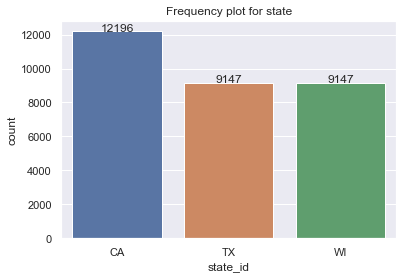

In [11]:
sn.set(style="darkgrid")
ax = sn.countplot(x= 'state_id', data= train_validation)
plt.title('Frequency plot for state')
add_count(ax);

It seems that there are more number of stores in state California(CA). And count of stores is same for Texas(TX) and Wisconsin(WI).  

<h3>==>  store_id</h3>

In [12]:
train_validation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

There are 4 different stores in state clifornia, and 3 different stores each in Texas and Wisconsin. 

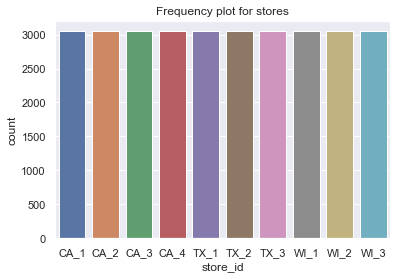

In [13]:
sn.set(style="darkgrid")
sn.countplot(x= 'store_id', data= train_validation)
plt.title('Frequency plot for stores');

As we can see that fequency occurence of all store ids are same, and, as California has 4 different stores that is why in previous fequency plot for state id, the frequncy of occurence for California is more.  

<h3>==>  cat_id</h3>

In [14]:
train_validation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

There are 3 unique categories of items. Let's check how much item is present in each categories.

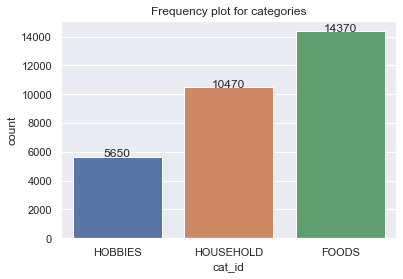

In [15]:
sn.set(style="darkgrid")
ax= sn.countplot(x= 'cat_id', data= train_validation)
plt.title('Frequency plot for categories')
add_count(ax);

There are more number of items present in food category. Followed by Household and then Hobbies.

<h3>==>  dept_id</h3>

In [16]:
train_validation['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

There are total 7 sub categories of items. There are 3 sub category for Food and 2 sub categories each in Hobbies and Household categories.

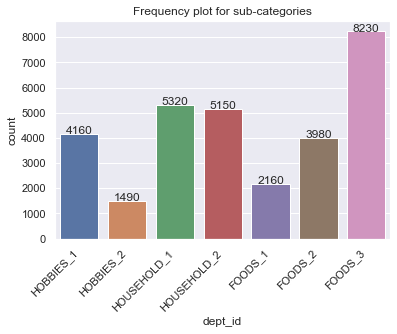

In [17]:
sn.set(style="darkgrid")
ax = sn.countplot(x= 'dept_id', data= train_validation)
plt.xticks(rotation = 45, ha= 'right')
plt.title('Frequency plot for sub-categories')
add_count(ax);

It seems that highest number of items belongs in Food_3 sub-category. After that Household_1 and Household_2 subcategories have the 2nd and 3rd highest number of items belonging to it. 

<h3>==>  item_id</h3>

Each item_id is combination of dept_id followed by 3 digit unique integer(representing unique item in that particular department). For ex:  HOBBIES_1_001, here HOBBIES_1 is department id and 001 is unique integer assigned to a particular product. 
From previous two plots we already found proportion of items belonging to each department. 

In [18]:
len(train_validation['item_id'].unique())

3049

In [19]:
df = pd.DataFrame(train_validation['item_id'].value_counts())
df.rename(columns={'item_id':'count'}, inplace = True)

In [20]:
df

,count
HOUSEHOLD_1_416,10
HOUSEHOLD_1_311,10
FOODS_2_104,10
FOODS_2_224,10
FOODS_3_194,10
...,...
FOODS_2_374,10
FOODS_3_705,10
FOODS_3_126,10
FOODS_2_285,10


There are 3049 unique items, and it seems that each of the item has count of 10. This can be because of each item appearing in all 10 stores. 

In [21]:
np.all(df['count']==10)

True

Yes, each of the item has occurrence of 10 in the sales_train dataframe. Now let's find out actual number of items belonging in each department/sub category.  

In [22]:
department = train_validation['dept_id'].unique()

for i in department:
    n = len(train_validation.loc[train_validation.dept_id== i,'item_id'])
    print('Number of uniques items in {} is {}'.format(i,int(n/10)))

Number of uniques items in HOBBIES_1 is 416
Number of uniques items in HOBBIES_2 is 149
Number of uniques items in HOUSEHOLD_1 is 532
Number of uniques items in HOUSEHOLD_2 is 515
Number of uniques items in FOODS_1 is 216
Number of uniques items in FOODS_2 is 398
Number of uniques items in FOODS_3 is 823


### Analysing Sales Column
Sales in each day for each timeseries is present in columns having prefix **d_**.

In [23]:
#storing all sales column in a list.
sales_column = [i for i in train_validation.columns if 'd_' in i]
print('First element in sales_column list: {} \nLast element in sales_column list: {} '.format(
    sales_column[0], sales_column[-1]))
print('Total number of sales column: ',len(sales_column))

First element in sales_column list: d_1 
Last element in sales_column list: d_1913 
Total number of sales column:  1913


We will randomly select 10 time-series and plot there sales values over 1913 days.
It will be easier for us if we transform our dataframe so that each of the timeseries will become columns and all the columns will become rows. So our new dataframe will have shape 1919 X 30490

In [24]:
#Sampling names from id column
sample_ts = train_validation['id'].sample(10)
sample_ts.reset_index(drop = True, inplace=True)
sample_ts[0]

'HOUSEHOLD_2_372_CA_3_validation'

In [25]:
#Transposing dataframe:
df_T = train_validation.transpose()
print(df_T.shape)
df_T.head()

(1919, 30490)


,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3


In [26]:
#Setting each column names in df_T to unique id.
df_T.columns = list(train_validation['id'])

#droping 1st row, which corresponds to id.
df_T.drop('id', inplace= True)

In [27]:
df_T.head(7)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0


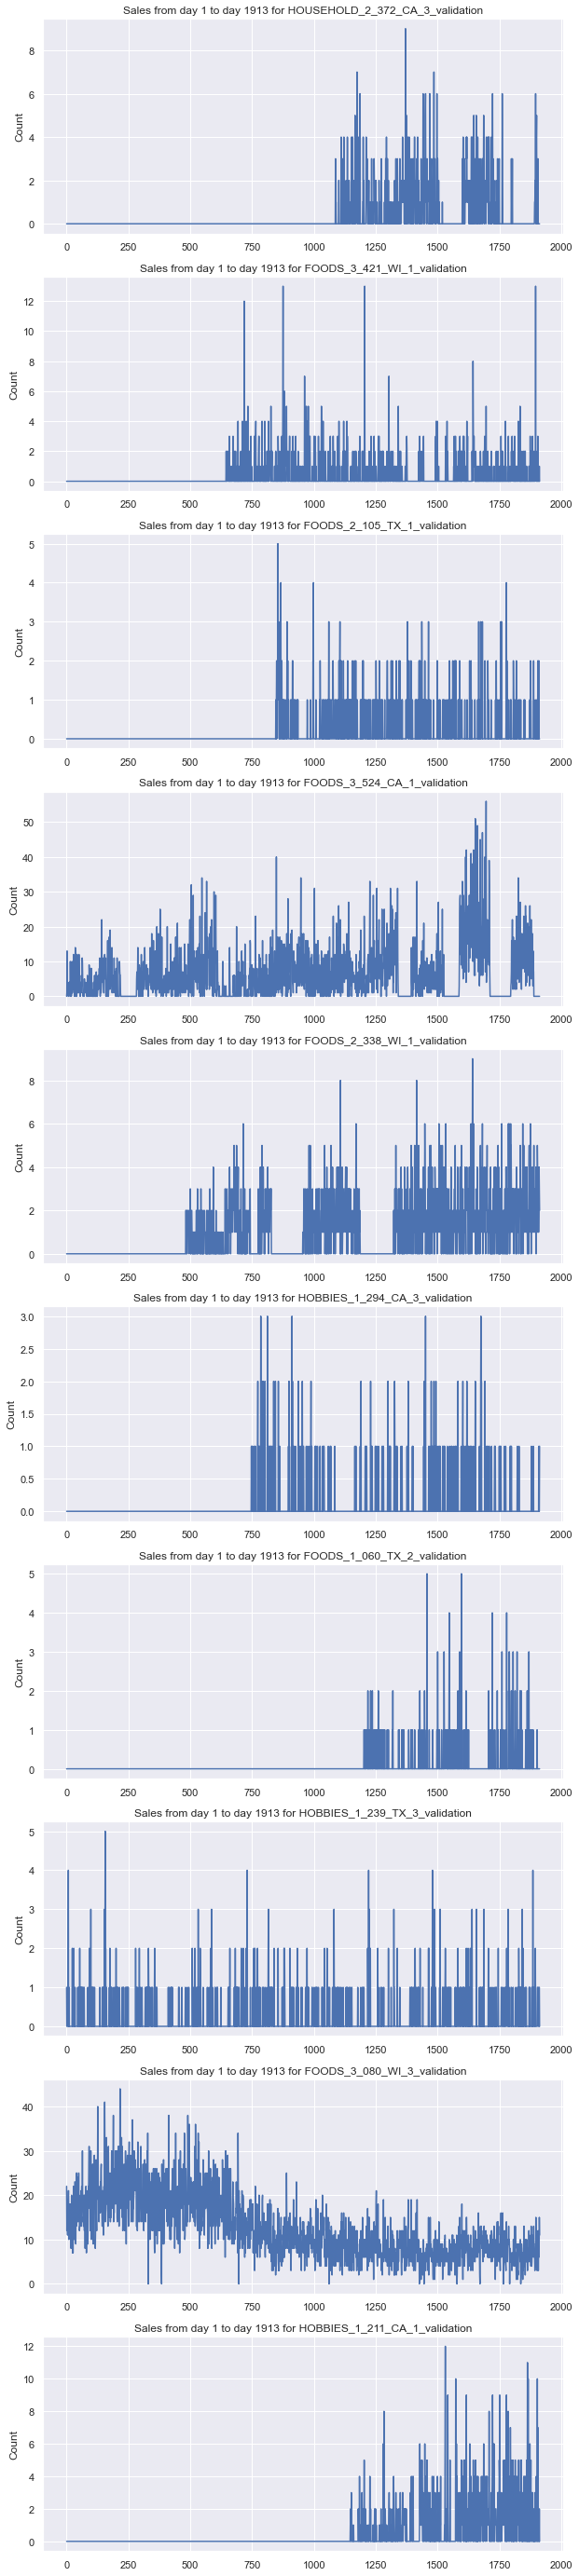

In [28]:
plt.figure(figsize = (10,50))
plt.tight_layout()
for i in range(1,11):
    plt.subplot(10,1,i)
    plt.plot(df_T[sample_ts[i-1]][5:].reset_index(drop = True))
    plt.title('Sales from day 1 to day 1913 for {}'.format(sample_ts[i-1]))
    plt.ylabel('Count')

Observation:
1. Some time series are introduced in later after half of the time range. 
2. We can see zero sales also for all time series, this will be a challenge for us to be handled later.
3. Sales of some time series hit as high as 70 and as low as zero also. 

## Agregation of sales statewise

In [29]:
def total_sales(col):
    unique_val = train_validation[col].unique()
    total_sales_df = pd.DataFrame()
    for uni in unique_val:
        total_sales_df[uni] = df_T.loc['d_1':,df_T.loc[col]==uni].sum(axis=1).values
    
    return total_sales_df
    

In [30]:
total_sales_statewise = total_sales('state_id')
total_sales_statewise

,CA,TX,WI
0,14195.0,9438.0,8998.0
1,13805.0,9630.0,8314.0
2,10108.0,6778.0,6897.0
3,11047.0,7381.0,6984.0
4,9925.0,5912.0,3309.0
...,...,...,...
1908,15148.0,9600.0,10595.0
1909,14488.0,9602.0,10943.0
1910,17095.0,10615.0,12807.0
1911,21834.0,12266.0,14862.0


In [31]:
def rel_plot(data, title, xlabel='Days'):
    '''
    This funtion is used to plot total sales over 1913 days
    store wise, dept wise, category wise, state wise
    '''
    sn.relplot(data=data, kind='line',height=7, aspect= 2, dashes=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Total Sales')
    plt.show()

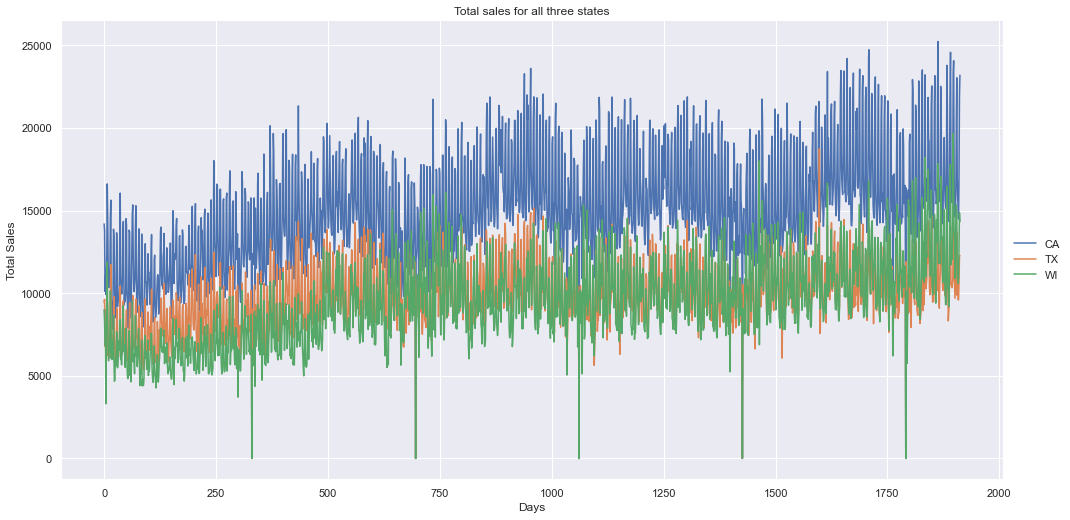

In [32]:
rel_plot(total_sales_statewise,'Total sales for all three states')

Observation:

* Total sales of items for California state is always above the other two states.
* Total sales for Texas and Wisconsin is highly overlapping, but for first 600days total sales of Texas is ahead of Wisconsin.
* For all the three states, we can observe that overall sales has increased from year 2011 to year 2015.
* One very interesting point that can be noticed here is that, Total sales for Wisconsin is hits almost zero for 5 times in this 1913 days duration. Also it seems that occurence of  near zero sales are happening at some regular intervals. 

Later we can find out about that particular day for which Total sales in Wisconsin state hits almost zero. That particular day may be some special day for Wisconsin, when all the stores are closed.

In [33]:
#Why not find the minimum total sales for all three states, and see whther it actually hits zero or not
total_sales_statewise.min()

CA    5.0
TX    2.0
WI    1.0
dtype: float64

By looking at the minimum values of total sales for all three states what we can conclude is that, total sales is never zero.
But as we are taking sum of the sales over all the stores in particular state for each day, which suggest that definitely all the stores might be closed at that particular day either with expception of one or two store open or error while creating data.

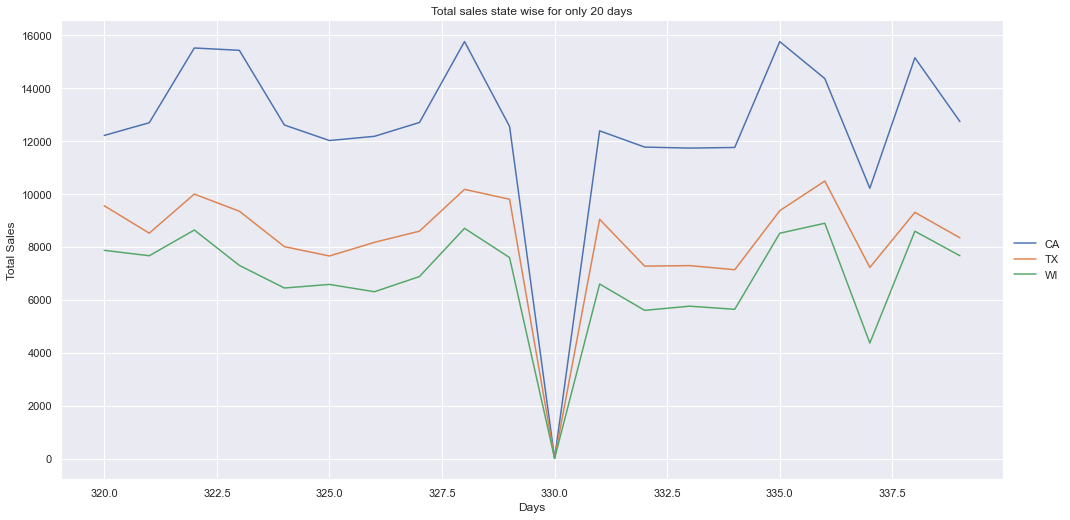

In [34]:
rel_plot(total_sales_statewise[320:340],'Total sales state wise for only 20 days')

At 330th day, total sales for all three states is near to zero. <br>
*Why not note down all the days, where the sales is almost zero for all three states because it might be helpful for us in feature engineering part?*

In [35]:
total_sales_statewise.loc[total_sales_statewise.sum(axis=1) <=20]

,CA,TX,WI
330,8.0,2.0,3.0
696,6.0,2.0,3.0
1061,5.0,13.0,2.0
1426,6.0,13.0,1.0
1791,6.0,4.0,4.0


>So on day 330, day 696, day 1061, day 1426 and day 1426 sales is almost near to zero. By using calendar data we can map these days to exact date they correspond to. 

## Total sales Store wise

In [36]:
total_sales_storewise = total_sales('store_id')
total_sales_storewise

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,4337.0,3494.0,4739.0,1625.0,2556.0,3852.0,3030.0,2704.0,2256.0,4038.0
1,4155.0,3046.0,4827.0,1777.0,2687.0,3937.0,3006.0,2194.0,1922.0,4198.0
2,2816.0,2121.0,3785.0,1386.0,1822.0,2731.0,2225.0,1562.0,2018.0,3317.0
3,3051.0,2324.0,4232.0,1440.0,2258.0,2954.0,2169.0,1251.0,2522.0,3211.0
4,2630.0,1942.0,3817.0,1536.0,1694.0,2492.0,1726.0,2.0,1175.0,2132.0
...,...,...,...,...,...,...,...,...,...,...
1908,3722.0,3691.0,5235.0,2500.0,2901.0,3384.0,3315.0,3242.0,4194.0,3159.0
1909,3709.0,3303.0,5018.0,2458.0,2776.0,3446.0,3380.0,3324.0,4393.0,3226.0
1910,4387.0,4457.0,5623.0,2628.0,3022.0,3902.0,3691.0,3991.0,4988.0,3828.0
1911,5577.0,5884.0,7419.0,2954.0,3700.0,4483.0,4083.0,4772.0,5404.0,4686.0


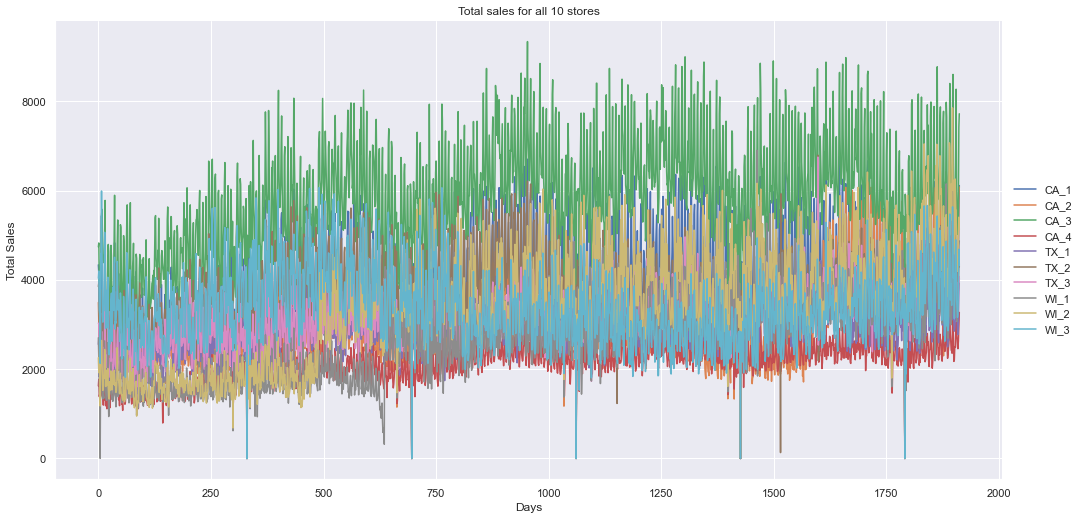

In [37]:
rel_plot(total_sales_storewise,'Total sales for all 10 stores')

We are unable conclude much from above plot, as there is lot of overlap in lower half of the plot. It will be better if we can zoom above plot vertically or plot just few store in each plot rather than plotting all stores total sales at once.

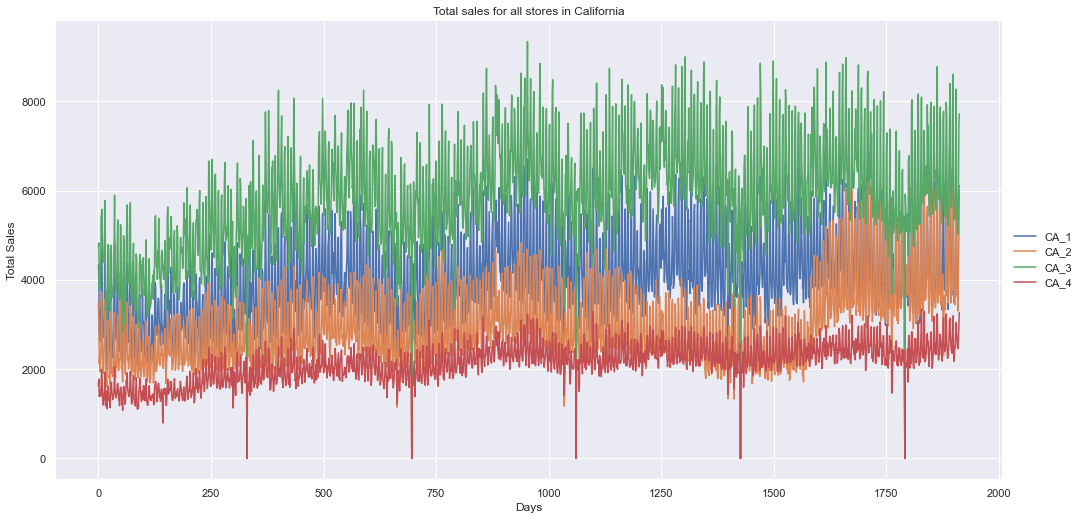

In [38]:
#Total sales for all stores in california state
rel_plot(total_sales_storewise.iloc[:,0:4],'Total sales for all stores in California')

Above plot show the total sales for all the four stores in California. We can observe the following:
* For store CA_3, it's total sales is always higher than all other stores. Total sales goes beyond 8000 units in this store, for many number of days. This can suggest that this store might be the largest and most crowded of all other 9 stores.
* For store CA_4, it's total sales is always below all other stores in claifornia.
* We can find dip in the total sales for store CA_2 in vicinity of day 1500, but again the sales rise upto 6000 units for some number of days. This can be because of some items introduced around year 2014(and it would have become popular choice of customers.

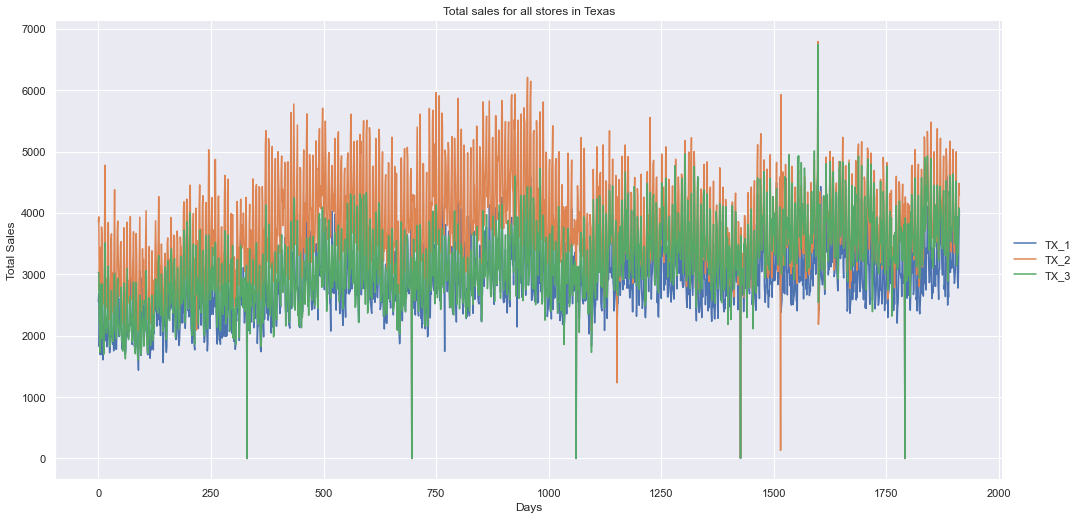

In [39]:
#Total sales for all stores in Texas state
rel_plot(total_sales_storewise.iloc[:,4:7],'Total sales for all stores in Texas')

For all stores in Texas, we observe that:
* Total sales for store TX_1 started deteriorating after 1000 days i.e year 2013.
* But the sales for TX_3 kept on increasing for year 2011 to year 2015. 
* Again we can see sales going to almost zero for 5 days.

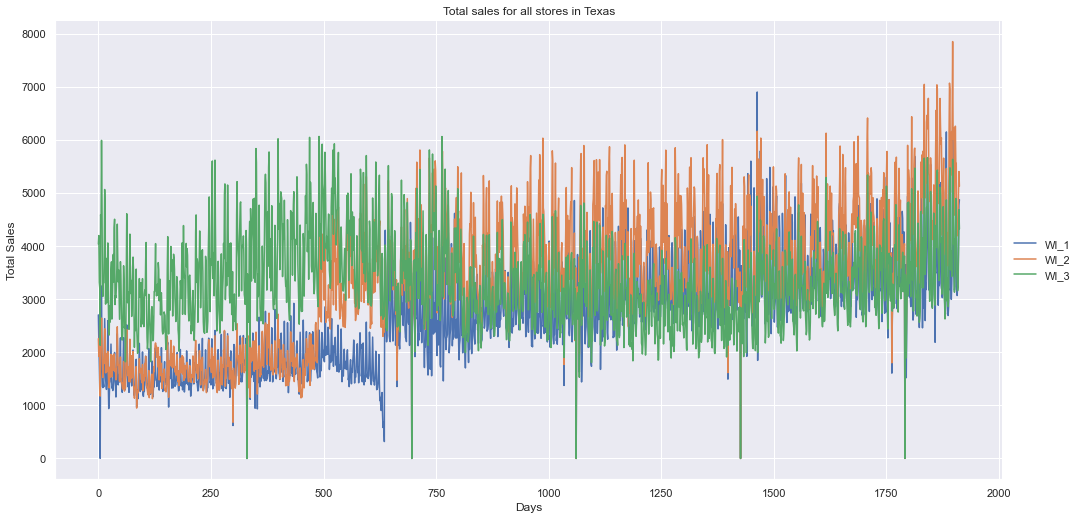

In [40]:
#Total sales for all stores in Wisconsin state
rel_plot(total_sales_storewise.iloc[:,7:],'Total sales for all stores in Texas')

From around day 500, total sales for store WI_2 started taking surge.
Similar kind of surge in sales observed for store WI_1 after day 600.
## Total sales Category Wise

In [41]:
total_sales_catwise = total_sales('cat_id')
total_sales_catwise

,HOBBIES,HOUSEHOLD,FOODS
0,3764.0,5689.0,23178.0
1,3357.0,5634.0,22758.0
2,2682.0,3927.0,17174.0
3,2669.0,3865.0,18878.0
4,1814.0,2729.0,14603.0
...,...,...,...
1908,3472.0,8239.0,23632.0
1909,3353.0,8363.0,23317.0
1910,4085.0,9728.0,26704.0
1911,4787.0,12248.0,31927.0


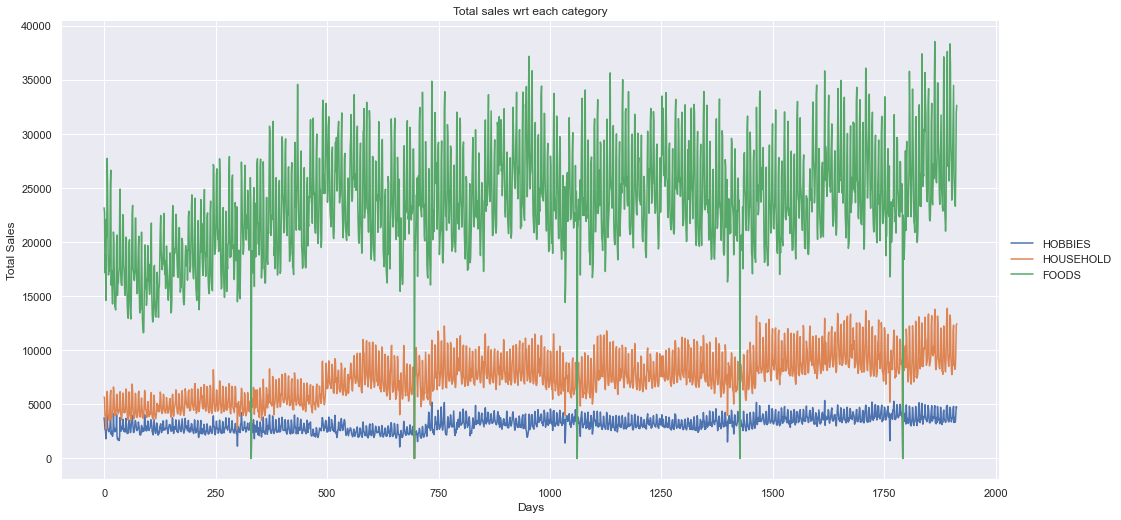

In [42]:
rel_plot(total_sales_catwise,'Total sales wrt each category')

Observation:
* We can again see almost zero sales pattern after regular number of days.
* Total sales of food items in always higher than Household and Hobbies category.
* For Hobby category, total sales is always below other tow categories, as the number of items is less in this category as compared to other two category. Also, items in hobbies category is reusable most of the time so people don't have to buy it again and again.
* Whereas household items have total sales between Hobbies and food category.

## Total sales Department Wise

In [43]:
total_sales_deptwise = total_sales('dept_id')
total_sales_deptwise

,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,FOODS_1,FOODS_2,FOODS_3
0,3610.0,154.0,4105.0,1584.0,2343.0,4094.0,16741.0
1,3172.0,185.0,3858.0,1776.0,2216.0,4209.0,16333.0
2,2497.0,185.0,2827.0,1100.0,1657.0,3174.0,12343.0
3,2531.0,138.0,2732.0,1133.0,1508.0,3606.0,13764.0
4,1714.0,100.0,1802.0,927.0,1209.0,2869.0,10525.0
...,...,...,...,...,...,...,...
1908,3141.0,331.0,6393.0,1846.0,2657.0,4734.0,16241.0
1909,3014.0,339.0,6580.0,1783.0,2639.0,4446.0,16232.0
1910,3678.0,407.0,7762.0,1966.0,3169.0,4974.0,18561.0
1911,4397.0,390.0,9545.0,2703.0,3712.0,5524.0,22691.0


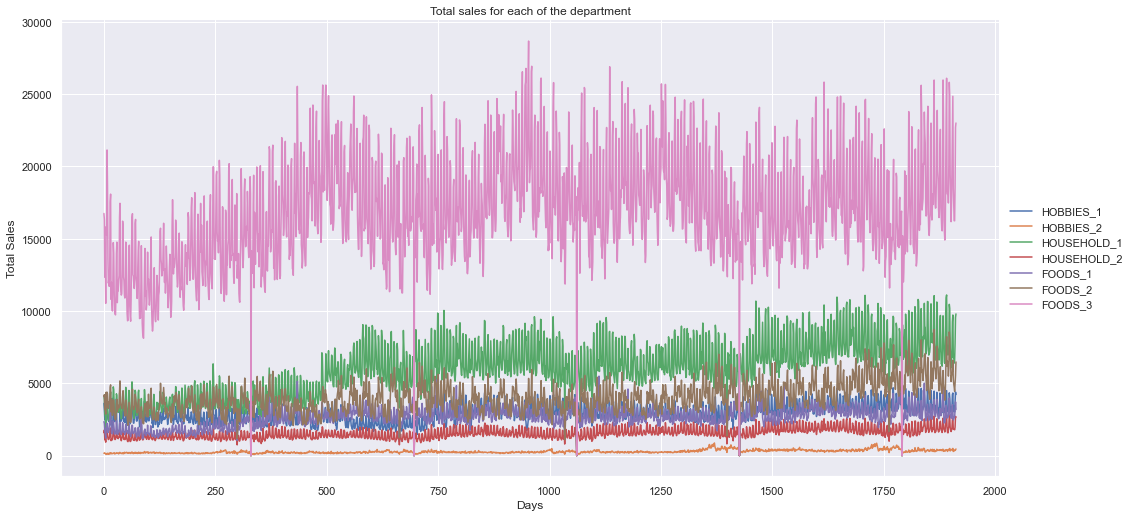

In [44]:
rel_plot(total_sales_deptwise, 'Total sales for each of the department')

Observation:
* Total sales in Food_3 department is always more than rest of the departments.
* For initial 500 days sales in Housefold_1 department was not much but after 500 days it started increasing.
* Hobbies_2 have the least total sales of all.

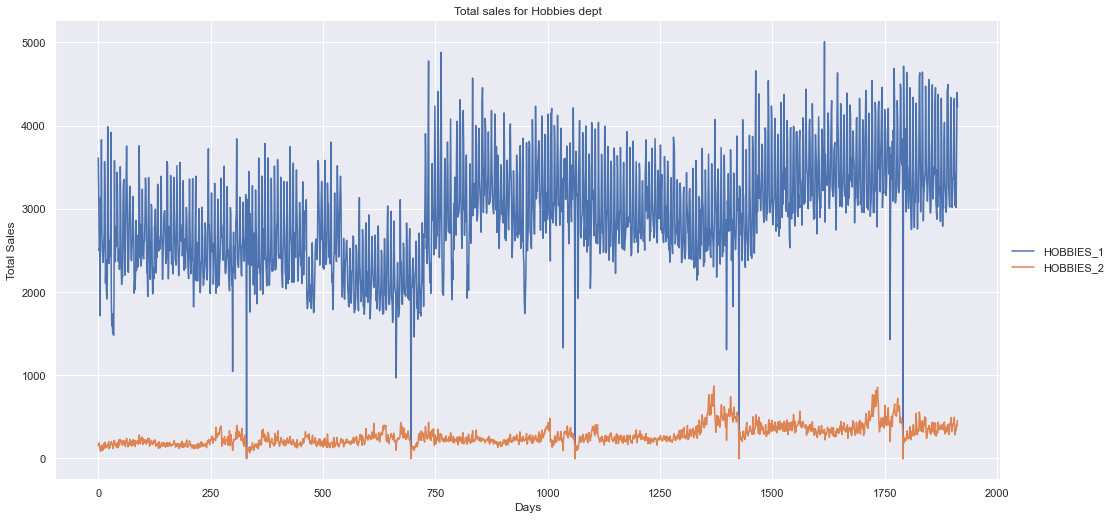

In [45]:
#plotting total sales for only Hobbies department.
rel_plot(total_sales_deptwise.iloc[:,0:2], 'Total sales for Hobbies dept')

Total sales for hobbies_1 department started dipping between 500th to 600th days, but again sales started growing after 600th days.<br>
Whereasa total sales for Hobbies_2 department is always below 1000 units daily.

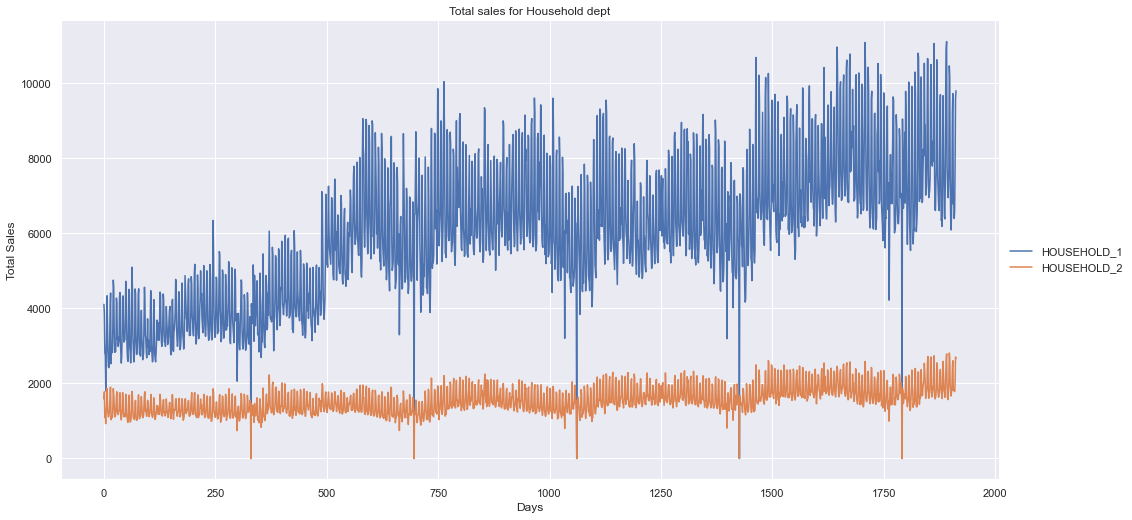

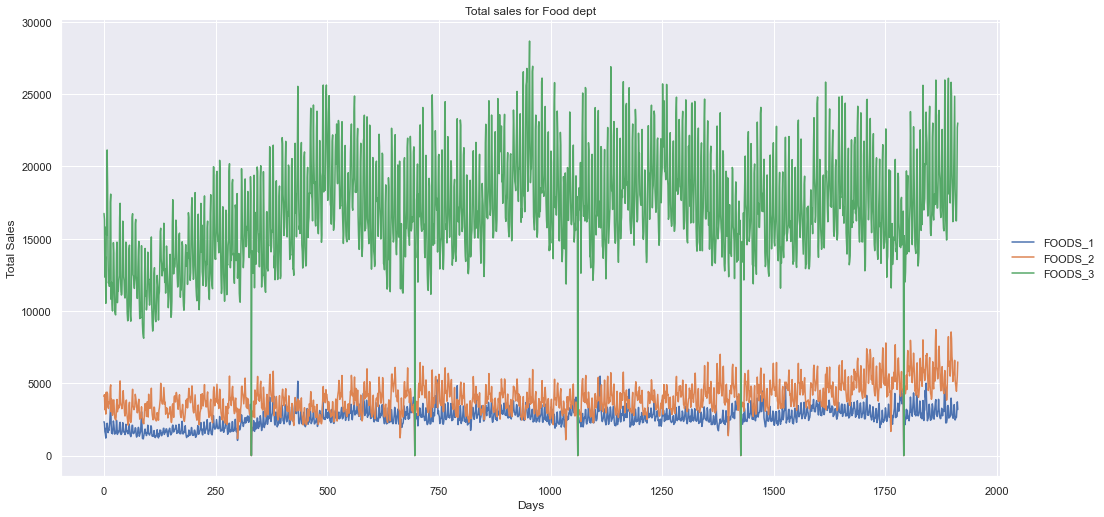

In [46]:
#plotting total sales for only Household department.
rel_plot(total_sales_deptwise.iloc[:,2:4], 'Total sales for Household dept')

#plotting total sales for only Food department.
rel_plot(total_sales_deptwise.iloc[:,4:], 'Total sales for Food dept')

In this 1913 days interval for item's total sales in food_3 dept is ahead of other departments but one point that we can notice is that total sales is going up then going down, kind of following wave like pattern.

In [47]:
#sn.relplot(data = total_sales_deptwise['HOUSEHOLD_1'].rolling(90).mean(),dashes= False)

## 90 days rolling average sales Store wise

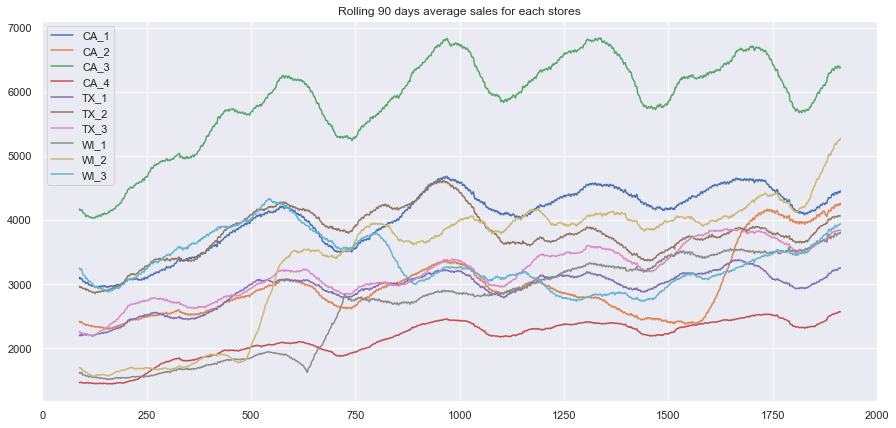

In [48]:
plt.figure(figsize=(15,7))
for col in total_sales_storewise.columns:
    plt.plot(total_sales_storewise[col].rolling(90).mean())
plt.title('Rolling 90 days average sales for each stores')    
plt.legend(total_sales_storewise.columns)
plt.show()

Some of the stores like CA_1 and CA_3 have sales value oscillating like sine wave, but the mean of this sine wave is linearly increasing. 

## 90 days rolling average sales department wise

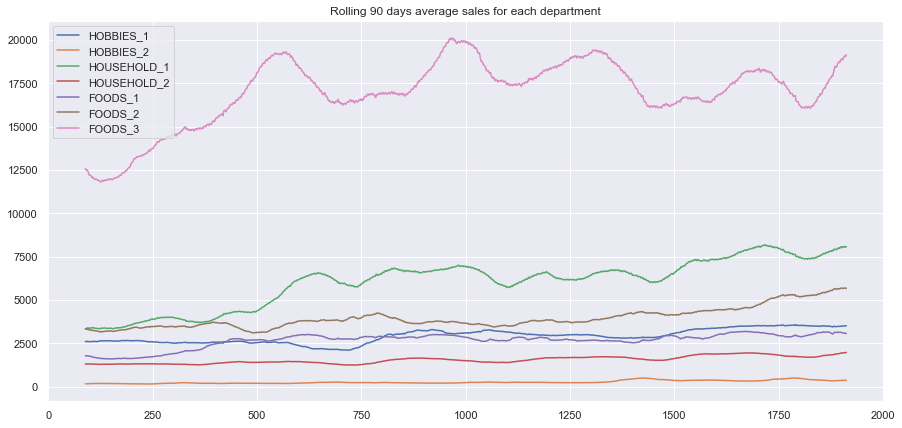

In [49]:
plt.figure(figsize=(15,7))
for col in total_sales_deptwise.columns:
    plt.plot(total_sales_deptwise[col].rolling(90).mean())
plt.title('Rolling 90 days average sales for each department')    
plt.legend(total_sales_deptwise.columns)
plt.show()

Hobbies_2 and Household_2 department has very flat rolling average curve as compared to other departments.This can be due to the reason, that, the need to buy items in these departments doesn't depend on seasons throughout the year.

## Exploring Calendar data

In [50]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [51]:
#It will be better if we can merge sales data calendar data for taking out better insight
merge_df = pd.merge(df_T,calendar, left_index = True, right_on = 'd')
merge_df

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,0,0,0,0,0,12,2,0,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,0,0,0,0,0,0,0,15,0,0,...,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,0,0,0,0,0,0,0,0,7,1,...,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,0,0,0,0,0,0,0,0,3,0,...,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1,1,1,0,1,0,1,4,0,0,...,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0
1909,3,0,0,1,2,0,0,6,0,0,...,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,0,0,1,3,2,2,0,3,0,2,...,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,1,0,1,7,2,0,1,2,0,0,...,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0


In [52]:
merge_df.set_index('d', inplace=True)
merge_df.head(7)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
d,,,,,,,,,,,,,,,,,,,,,
d_1,0,0,0,0,0,0,0,12,2,0,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
d_5,0,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
d_6,0,0,0,0,0,0,0,4,2,0,...,6,2,2011,NaN,NaN,NaN,NaN,1,1,1
d_7,0,0,0,0,0,0,0,6,3,0,...,7,2,2011,NaN,NaN,NaN,NaN,1,0,0


In [53]:
merge_df = merge_df.apply(pd.to_numeric,errors='ignore')

In [54]:
#grouping sales based on days of week
group_weekday = merge_df.groupby(['weekday']).sum()
group_weekday.drop(columns=['wm_yr_wk','wday','month','year','snap_CA','snap_TX','snap_WI'], inplace=True)
group_weekday

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,81.0,75.0,47.0,392.0,248.0,200.0,63.0,2108.0,297.0,183.0,...,825.0,446.0,197.0,838.0,149.0,87.0,223.0,80.0,194.0,3.764753e+20
Monday,78.0,57.0,29.0,380.0,215.0,272.0,56.0,1927.0,315.0,179.0,...,736.0,379.0,128.0,908.0,161.0,119.0,270.0,96.0,196.0,3.763810e+20
Saturday,123.0,96.0,68.0,692.0,375.0,289.0,74.0,2360.0,417.0,219.0,...,870.0,528.0,236.0,1100.0,144.0,99.0,298.0,106.0,224.0,3.777951e+20
Sunday,91.0,76.0,44.0,859.0,355.0,242.0,67.0,1752.0,346.0,306.0,...,778.0,450.0,219.0,1027.0,168.0,124.0,284.0,137.0,195.0,3.778188e+20
Thursday,65.0,71.0,36.0,392.0,222.0,229.0,54.0,1833.0,292.0,152.0,...,666.0,395.0,154.0,735.0,132.0,100.0,202.0,87.0,134.0,3.764517e+20
Tuesday,96.0,58.0,32.0,294.0,200.0,212.0,60.0,1786.0,336.0,166.0,...,675.0,363.0,134.0,696.0,128.0,95.0,224.0,113.0,224.0,3.764045e+20
Wednesday,66.0,60.0,32.0,279.0,234.0,198.0,50.0,2064.0,266.0,171.0,...,665.0,396.0,164.0,760.0,140.0,96.0,211.0,83.0,162.0,3.764281e+20


In [55]:
group_weekday = pd.concat([df_T.iloc[0:5,:],group_weekday], sort=False)
group_weekday

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827,NaN
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,NaN
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,NaN
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,NaN
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,NaN
Friday,81,75,47,392,248,200,63,2108,297,183,...,825,446,197,838,149,87,223,80,194,3.764753e+20
Monday,78,57,29,380,215,272,56,1927,315,179,...,736,379,128,908,161,119,270,96,196,3.763810e+20
Saturday,123,96,68,692,375,289,74,2360,417,219,...,870,528,236,1100,144,99,298,106,224,3.777951e+20
Sunday,91,76,44,859,355,242,67,1752,346,306,...,778,450,219,1027,168,124,284,137,195,3.778188e+20
Thursday,65,71,36,392,222,229,54,1833,292,152,...,666,395,154,735,132,100,202,87,134,3.764517e+20


In [56]:
unique_val = train_validation['state_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_weekday.loc['Friday':,group_weekday.loc['state_id']==uni].sum(axis=1).values

total_sales_df

,CA,TX,WI
0,4006162.0,2627034.0,2710498.0
1,3967465.0,2634239.0,2367156.0
2,4977055.0,3188084.0,3218710.0
3,5052013.0,3306380.0,2911233.0
4,3536236.0,2388387.0,2321344.0
5,3614175.0,2385601.0,2290901.0
6,3522441.0,2369281.0,2301014.0


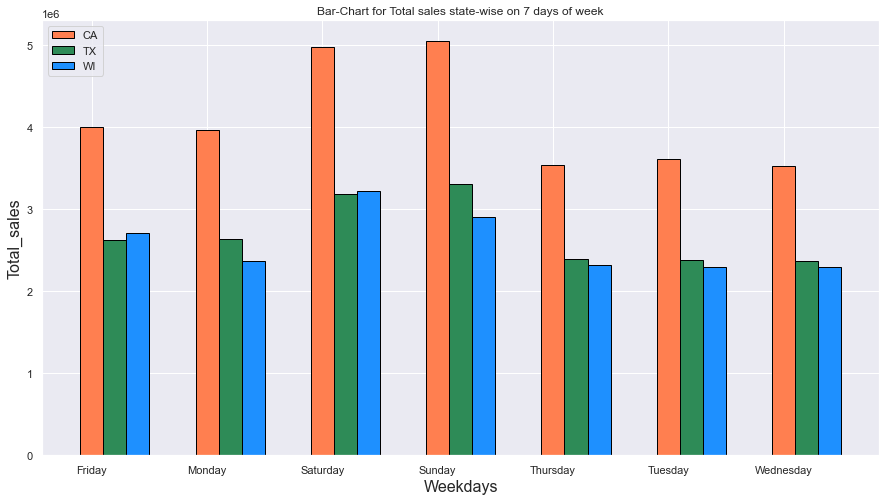

In [57]:
#Grouped bar chart: https://www.datasciencemadesimple.com/bar-plot-bar-chart-in-python-legend-using-matplotlib/#:~:text=%20Bar%20Chart%20in%20Python%3A%20%201%20Line,and%20title%20and%20shows%20the%20output.%20More%20
weekday = ['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
states = ['CA','TX','WI']
pos = np.arange(len(weekday))
bar_width = 0.2
plt.figure(figsize=(15,8))
plt.bar(pos, total_sales_df['CA'],bar_width,color='coral',edgecolor='black')
plt.bar(pos+bar_width, total_sales_df['TX'],bar_width,color='seagreen',edgecolor='black')
plt.bar(pos+(2*bar_width),total_sales_df['WI'],bar_width, color='dodgerblue',edgecolor='black')
plt.xticks(pos,weekday)
plt.xlabel('Weekdays',fontsize=16)
plt.ylabel('Total_sales', fontsize=16)
plt.title('Bar-Chart for Total sales state-wise on 7 days of week')
plt.legend(states,loc=2)
plt.show()

Observation:
* Highest sales was recorded on weekends for all of the three states.
* Among all three states California recorded highest total sales on all 7 days.
* On wednesday, Tuesday and thursday total sales seems to be same across all three states.

In [58]:
unique_val = train_validation['cat_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_weekday.loc['Friday':,group_weekday.loc['cat_id']==uni].sum(axis=1).values

total_sales_df

,HOBBIES,HOUSEHOLD,FOODS
0,907405.0,2085177.0,6351112.0
1,813632.0,1948463.0,6206765.0
2,1076911.0,2613785.0,7693153.0
3,976586.0,2525992.0,7767048.0
4,786135.0,1775984.0,5683848.0
5,777821.0,1776018.0,5736838.0
6,786310.0,1755251.0,5651175.0


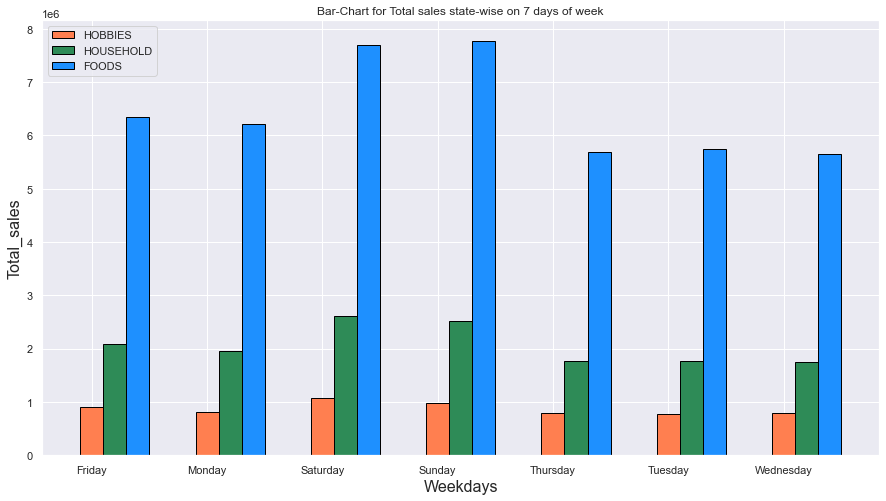

In [59]:
cat = ['HOBBIES','HOUSEHOLD','FOODS']
pos = np.arange(len(weekday))
bar_width = 0.2
plt.figure(figsize=(15,8))
plt.bar(pos, total_sales_df['HOBBIES'],bar_width,color='coral',edgecolor='black')
plt.bar(pos+bar_width, total_sales_df['HOUSEHOLD'],bar_width,color='seagreen',edgecolor='black')
plt.bar(pos+(2*bar_width),total_sales_df['FOODS'],bar_width, color='dodgerblue',edgecolor='black')
plt.xticks(pos,weekday)
plt.xlabel('Weekdays',fontsize=16)
plt.ylabel('Total_sales', fontsize=16)
plt.title('Bar-Chart for Total sales state-wise on 7 days of week')
plt.legend(cat,loc=2)
plt.show()

Observation:
* Same pattern obsereved here also, on weekends highest sale is observed in all three categories. 
* After that, monday and friday have highest sales followed by thursday, tuesday and wednesday.

In [60]:
#grouping sales based on months
group_month = merge_df.groupby(['month']).sum()
group_month.drop(columns=['wm_yr_wk','wday','year','snap_CA','snap_TX','snap_WI'], inplace=True)
group_month

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
month,,,,,,,,,,,,,,,,,,,,,
1,56.0,24.0,16.0,259.0,138.0,144.0,48.0,1343.0,189.0,110.0,...,454.0,232.0,98.0,613.0,66.0,26.0,116.0,55.0,107.0,2.193101e+20
2,62.0,23.0,30.0,276.0,145.0,146.0,30.0,1559.0,171.0,129.0,...,630.0,271.0,103.0,633.0,152.0,64.0,265.0,34.0,112.0,2.340530e+20
3,64.0,29.0,37.0,320.0,135.0,157.0,40.0,907.0,207.0,116.0,...,626.0,299.0,90.0,533.0,171.0,75.0,225.0,40.0,152.0,2.565238e+20
4,56.0,20.0,28.0,299.0,116.0,120.0,27.0,1318.0,237.0,126.0,...,563.0,319.0,120.0,648.0,116.0,99.0,167.0,50.0,138.0,2.399526e+20
5,13.0,36.0,20.0,275.0,130.0,138.0,39.0,971.0,201.0,100.0,...,530.0,229.0,90.0,430.0,64.0,64.0,130.0,35.0,143.0,2.121400e+20
6,32.0,37.0,14.0,230.0,148.0,105.0,30.0,1111.0,228.0,118.0,...,413.0,180.0,95.0,283.0,45.0,74.0,123.0,33.0,105.0,2.056920e+20
7,35.0,47.0,14.0,253.0,119.0,142.0,31.0,1195.0,187.0,125.0,...,339.0,235.0,94.0,353.0,49.0,91.0,145.0,36.0,99.0,2.129569e+20
8,51.0,54.0,14.0,285.0,172.0,129.0,28.0,950.0,198.0,129.0,...,404.0,204.0,106.0,511.0,61.0,70.0,108.0,51.0,100.0,2.133721e+20
9,56.0,31.0,29.0,279.0,185.0,121.0,33.0,1001.0,120.0,107.0,...,404.0,214.0,109.0,319.0,72.0,54.0,100.0,106.0,105.0,2.068844e+20


In [61]:
group_month = pd.concat([df_T.iloc[0:5,:],group_month], sort=False)
group_month.head(7)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827,NaN
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,NaN
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,NaN
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,NaN
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,NaN
1,56,24,16,259,138,144,48,1343,189,110,...,454,232,98,613,66,26,116,55,107,2.193101e+20
2,62,23,30,276,145,146,30,1559,171,129,...,630,271,103,633,152,64,265,34,112,2.340530e+20


In [62]:
group_month.index = group_month.index.astype(str)

In [63]:
unique_val = train_validation['state_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_month.loc['1':,group_month.loc['state_id']==uni].sum(axis=1).values

total_sales_df.set_index(np.arange(1,13), inplace=True)
total_sales_df

,CA,TX,WI
1,2310016.0,1486819.0,1548676.0
2,2487243.0,1685385.0,1716961.0
3,2757151.0,1833129.0,1796930.0
4,2609834.0,1720852.0,1630325.0
5,2220716.0,1484933.0,1332448.0
6,2319163.0,1538004.0,1393045.0
7,2409945.0,1583048.0,1450982.0
8,2473609.0,1631287.0,1466834.0
9,2363481.0,1529218.0,1429190.0
10,2374380.0,1539493.0,1466716.0


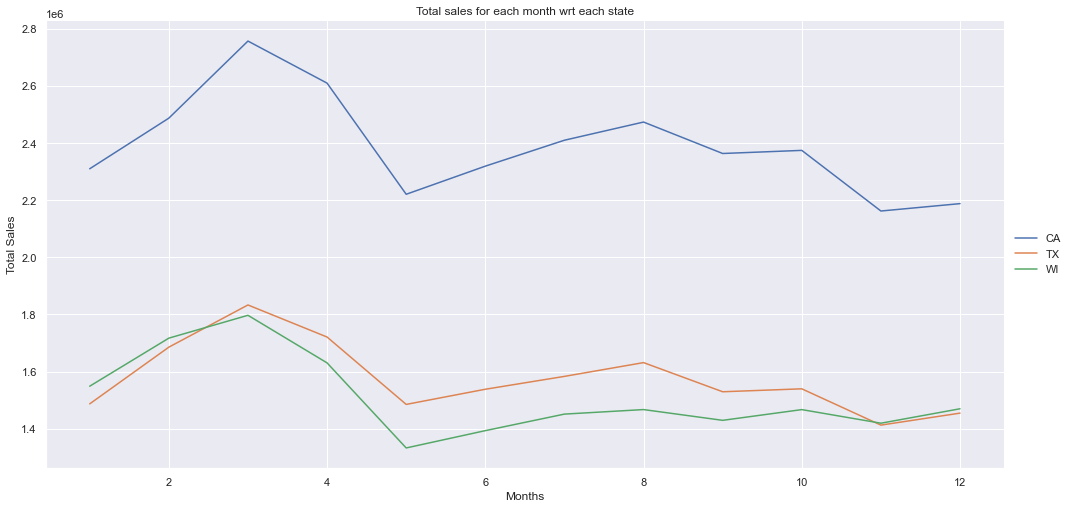

In [64]:
rel_plot(total_sales_df,'Total sales for each month wrt each state','Months')

Observation:
* California's total sales is always ahead of Texas and California.
* From 1st month i.e january sales started taking rise and it's on peak in march month and then took dip in 5th month i.e May month. This trend is followed by all of the three states.
* After May month sales again started taking rise, then dipping after 8th month. 
* Total sales for texas is ahead of Wisconsin except for some intial and ending month.

In [65]:
unique_val = train_validation['store_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_month.loc['1':,group_month.loc['store_id']==uni].sum(axis=1).values

total_sales_df.set_index(np.arange(1,13), inplace=True)
total_sales_df

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
1,612684.0,462367.0,897004.0,337961.0,440074.0,566110.0,480635.0,449168.0,562106.0,537402.0
2,663155.0,496826.0,971206.0,356056.0,494442.0,648746.0,542197.0,471352.0,625269.0,620340.0
3,732819.0,554375.0,1072785.0,397172.0,542227.0,700997.0,589905.0,510957.0,633278.0,652695.0
4,708371.0,517083.0,1007776.0,376604.0,517359.0,651992.0,551501.0,468326.0,581504.0,580495.0
5,613015.0,415884.0,868943.0,322874.0,446871.0,564421.0,473641.0,389588.0,458556.0,484304.0
6,625257.0,450116.0,916812.0,326978.0,456428.0,589498.0,492078.0,400164.0,500020.0,492861.0
7,648071.0,477257.0,949142.0,335475.0,465898.0,608094.0,509056.0,410127.0,524180.0,516675.0
8,665090.0,490003.0,978528.0,339988.0,481436.0,620015.0,529836.0,404954.0,546193.0,515687.0
9,620576.0,471995.0,933203.0,337707.0,451421.0,582739.0,495058.0,385590.0,536039.0,507561.0
10,628877.0,472934.0,926900.0,345669.0,448463.0,587932.0,503098.0,398035.0,548210.0,520471.0


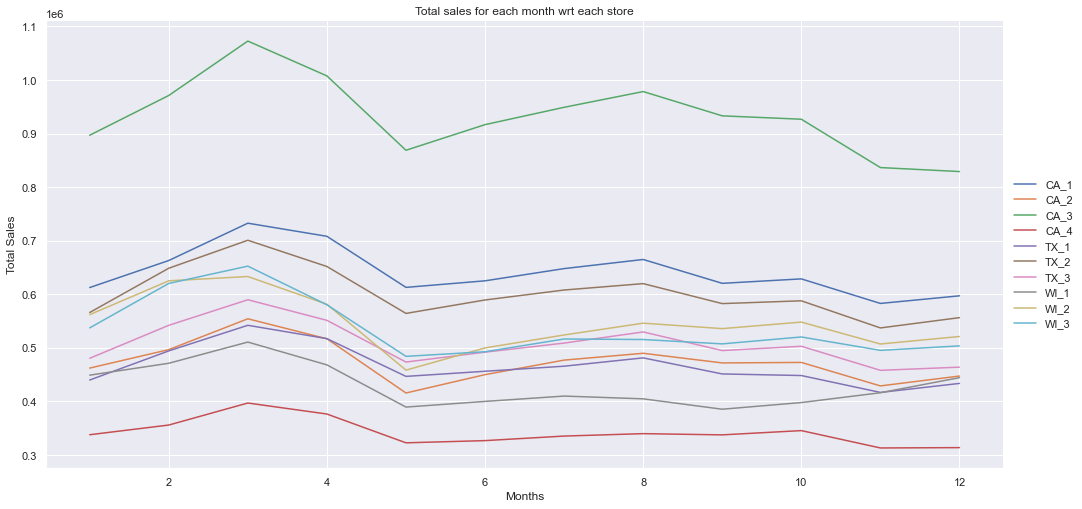

In [66]:
rel_plot(total_sales_df,'Total sales for each month wrt each store', 'Months')

The trend that we observed in previous plot, same kind of total sales trend is followed by each of the store. CA_1 store sales is always quiet ahead of the rest of stores.<br> Interesting point we can notice that, irrespective of the total sales of California state which is always ahead of other two states, one store from California i.e CA_4 has a total sales which is always below rest of the stores.

In [67]:
unique_val = train_validation['cat_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_month.loc['1':,group_month.loc['cat_id']==uni].sum(axis=1).values

total_sales_df.set_index(np.arange(1,13), inplace=True)
total_sales_df.head()

,HOBBIES,HOUSEHOLD,FOODS
1,495791.0,1136020.0,3713700.0
2,559146.0,1318591.0,4011852.0
3,598938.0,1434616.0,4353656.0
4,576396.0,1320504.0,4064111.0
5,489498.0,1090883.0,3457716.0


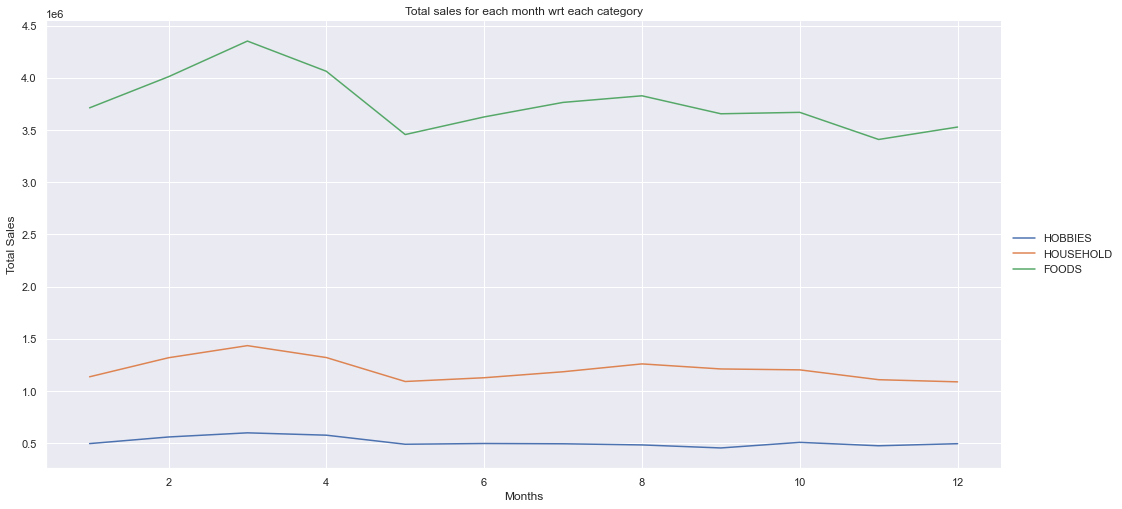

In [68]:
rel_plot(total_sales_df,'Total sales for each month wrt each category','Months')

Observation:
* Total sales over all 12 months for food category is always ahead of Household and Foods. Reason can be food is the necessity of one's survival.
* Here also this plot gives us evidence that sales used to dip surely in May month.

In [69]:
unique_val = train_validation['dept_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_month.loc['1':,group_month.loc['dept_id']==uni].sum(axis=1).values

total_sales_df.set_index(np.arange(1,13), inplace=True)
total_sales_df.head()

,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2,FOODS_1,FOODS_2,FOODS_3
1,454711.0,41080.0,909447.0,226573.0,427708.0,681612.0,2604380.0
2,512550.0,46596.0,1045728.0,272863.0,477544.0,714842.0,2819466.0
3,549181.0,49757.0,1129378.0,305238.0,491773.0,763462.0,3098421.0
4,530790.0,45606.0,1032924.0,287580.0,453296.0,682417.0,2928398.0
5,448923.0,40575.0,847168.0,243715.0,390957.0,551138.0,2515621.0


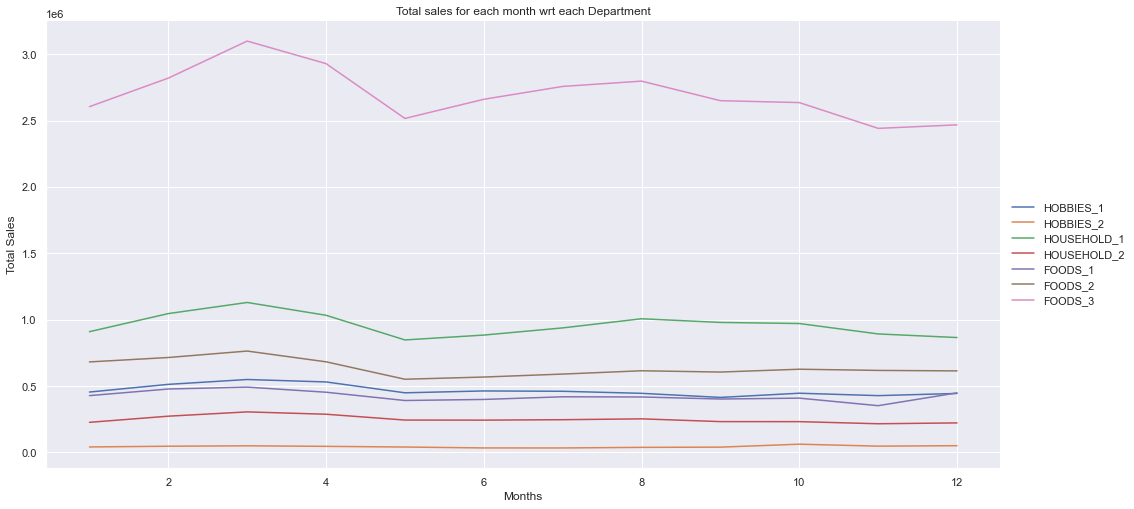

In [70]:
rel_plot(total_sales_df,'Total sales for each month wrt each Department','Months')

Items in Hobbies_2 department have total sales almost flat over all the 12 months, no different trend is observed in sales over whole year.

In [71]:
#grouping sales based on year
group_year = merge_df.groupby(['year']).sum()
group_year.drop(columns=['wm_yr_wk','wday','month','snap_CA','snap_TX','snap_WI'], inplace=True)
group_year

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
year,,,,,,,,,,,,,,,,,,,,,
2011,0.0,58.0,0.0,425.0,269.0,0.0,0.0,2224.0,614.0,179.0,...,2022.0,575.0,0.0,740.0,498.0,273.0,476.0,0.0,0.0,4.417310e+20
2012,0.0,91.0,0.0,420.0,310.0,471.0,32.0,1361.0,621.0,323.0,...,1013.0,572.0,0.0,1592.0,70.0,200.0,244.0,0.0,0.0,4.908587e+20
2013,84.0,85.0,0.0,582.0,383.0,425.0,138.0,2516.0,483.0,285.0,...,589.0,465.0,266.0,1424.0,59.0,134.0,276.0,145.0,0.0,5.010440e+20
2014,186.0,117.0,60.0,862.0,344.0,415.0,116.0,3176.0,335.0,305.0,...,733.0,508.0,329.0,1347.0,114.0,89.0,356.0,151.0,501.0,5.125546e+20
2015,222.0,122.0,182.0,771.0,420.0,228.0,94.0,3409.0,182.0,217.0,...,602.0,638.0,515.0,708.0,223.0,15.0,258.0,273.0,650.0,5.240652e+20
2016,108.0,20.0,46.0,228.0,123.0,103.0,44.0,1144.0,34.0,67.0,...,256.0,199.0,122.0,253.0,58.0,9.0,102.0,133.0,178.0,1.675011e+20


In [72]:
group_year = pd.concat([df_T.iloc[0:5,:],group_year], sort=False)
group_year.head(7)

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation,date
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827,NaN
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,NaN
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,NaN
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,NaN
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,NaN
2011,0,58,0,425,269,0,0,2224,614,179,...,2022,575,0,740,498,273,476,0,0,4.417310e+20
2012,0,91,0,420,310,471,32,1361,621,323,...,1013,572,0,1592,70,200,244,0,0,4.908587e+20


In [73]:
group_year.index = group_year.index.astype(str)

In [74]:
unique_val = train_validation['state_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_year.loc['2011':,group_year.loc['state_id']==uni].sum(axis=1).values

total_sales_df

,CA,TX,WI
0,3943802.0,2711159.0,2201624.0
1,5268487.0,3611531.0,3181819.0
2,5733801.0,3778059.0,3623893.0
3,5748876.0,3673215.0,3667685.0
4,5967138.0,3858923.0,3974750.0
5,2013443.0,1266119.0,1471085.0


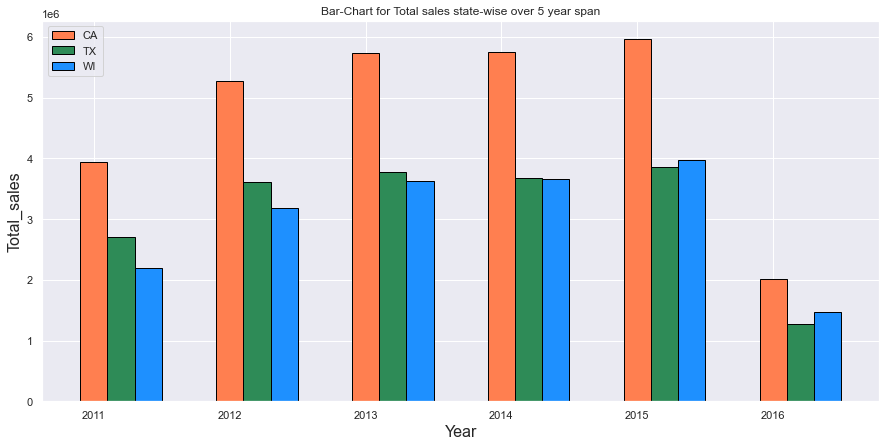

In [75]:
year = ['2011','2012','2013','2014','2015','2016']
states = ['CA','TX','WI']
pos = np.arange(len(year))
bar_width = 0.2
plt.figure(figsize=(15,7))
plt.bar(pos, total_sales_df['CA'],bar_width,color='coral',edgecolor='black')
plt.bar(pos+bar_width, total_sales_df['TX'],bar_width,color='seagreen',edgecolor='black')
plt.bar(pos+(2*bar_width),total_sales_df['WI'],bar_width, color='dodgerblue',edgecolor='black')
plt.xticks(pos,year)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total_sales', fontsize=16)
plt.title('Bar-Chart for Total sales state-wise over 5 year span')
plt.legend(states,loc=2)
plt.show()

Observation:
Total sales is observed to be increasing from 2011 to 2015, but in 2016 total sales is less for all 3 states because the data we have in validation set is uptill '2016-06-19' i.e only 6 month data is given.

In [76]:
unique_val = train_validation['cat_id'].unique()
total_sales_df = pd.DataFrame()
for uni in unique_val:
    total_sales_df[uni] = group_year.loc['2011':,group_year.loc['cat_id']==uni].sum(axis=1).values

total_sales_df

,HOBBIES,HOUSEHOLD,FOODS
0,939151.0,1658570.0,6258864.0
1,959837.0,2441732.0,8660268.0
2,1208059.0,2936212.0,8991482.0
3,1183846.0,2910405.0,8995525.0
4,1390155.0,3396801.0,9013855.0
5,443752.0,1136950.0,3169945.0


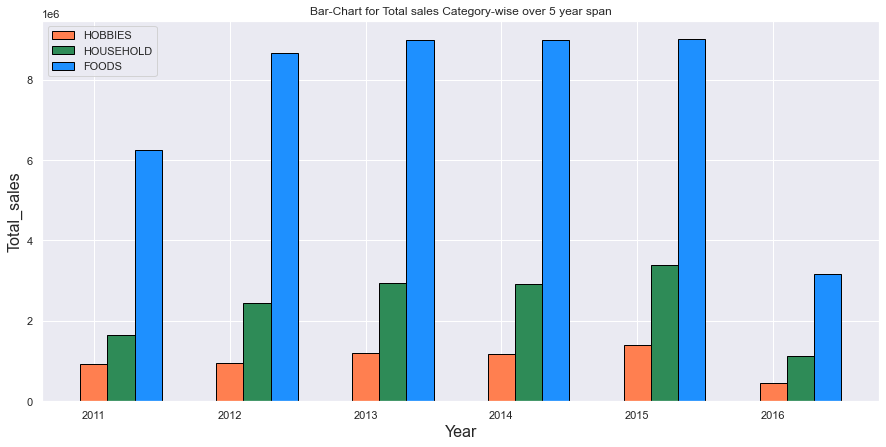

In [77]:
category = ['HOBBIES','HOUSEHOLD','FOODS']
pos = np.arange(len(year))
bar_width = 0.2
plt.figure(figsize=(15,7))
plt.bar(pos, total_sales_df['HOBBIES'],bar_width,color='coral',edgecolor='black')
plt.bar(pos+bar_width, total_sales_df['HOUSEHOLD'],bar_width,color='seagreen',edgecolor='black')
plt.bar(pos+(2*bar_width),total_sales_df['FOODS'],bar_width, color='dodgerblue',edgecolor='black')
plt.xticks(pos,year)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total_sales', fontsize=16)
plt.title('Bar-Chart for Total sales Category-wise over 5 year span')
plt.legend(category,loc=2)
plt.show()

Similar to previous plot, sales pattern too observed here yearwise wrt categories are increasing from 2011 to 2015, then dipped in 2016. 

Here, in calendar dataset SNAP features is  a binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.<br>
>What is SNAP?<br>
The United States federal government provides a nutrition assistance benefit called the Supplement Nutrition Assistance Program (SNAP). SNAP provides low income families and individuals with an Electronic Benefits Transfer debit card to purchase food products. In many states, the monetary benefits are dispersed to people across 10 days of the month and on each of these days 1/10 of the people will receive the benefit on their card. More information about the SNAP program can be found [here.](https://www.fns.usda.gov/snap/supplemental-nutrition-assistance-program)
<br>
And EVENT_NAME columns tell us whether on that particular date there is any event or not. If there is any event associated with a particular day then name of that event is given otherwise the corresponding value is NAN.

In [78]:
calendar.loc[:,'event_name_1':'event_type_2'].notnull().sum()

event_name_1    162
event_type_1    162
event_name_2      5
event_type_2      5
dtype: int64

In [79]:
#Creating one column denoting both event_1 and event_2 combined.
calendar['event']= None
for i in range(0,1969):
    if calendar.loc[i,'event_name_1':'event_type_2'].isnull().sum()==4:
        calendar.loc[i,'event'] = np.NAN
    else:
        calendar.loc[i,'event'] = 'IsEvent'

In [80]:
calendar['event'].notnull().sum()

162

Out of all 1969 days there are only 162 days on which there is some event occured. Now I will move to analyse snap days. I took idea about how to analyse snap days for this [notebook](https://www.kaggle.com/ryuheeeei/let-s-start-from-here-beginners-data-analysis#Snap-Purchase-Analysis) from competition page.

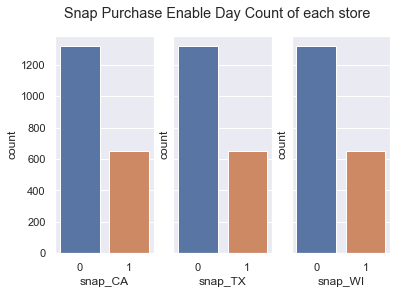

In [81]:
fig, axs = plt.subplots(1, 3, sharey=True)
fig.suptitle("Snap Purchase Enable Day Count of each store")

sn.countplot(x="snap_CA", data =calendar, ax=axs[0])
sn.countplot(x="snap_TX", data =calendar, ax=axs[1])
sn.countplot(x="snap_WI", data =calendar, ax=axs[2]);

For all three states, snap and no snap days counts are same.

In [82]:
#Grouping snap days year wise.
temp_df = calendar.groupby(["year"])[["snap_CA", "snap_TX", "snap_WI"]].sum()
temp_df

,snap_CA,snap_TX,snap_WI
year,,,
2011,110,110,110
2012,120,120,120
2013,120,120,120
2014,120,120,120
2015,120,120,120
2016,60,60,60


For all three states, count of snap days is same over for all the years.

In [83]:
temp_df = calendar[calendar["year"] == 2014].groupby(["month"])[["snap_CA", "snap_TX", "snap_WI"]].sum()
temp_df

,snap_CA,snap_TX,snap_WI
month,,,
1,10,10,10
2,10,10,10
3,10,10,10
4,10,10,10
5,10,10,10
6,10,10,10
7,10,10,10
8,10,10,10
9,10,10,10


There are total 10 snap days in each month for the year 2014. It shows that in all the US states snap days protocol is same. 

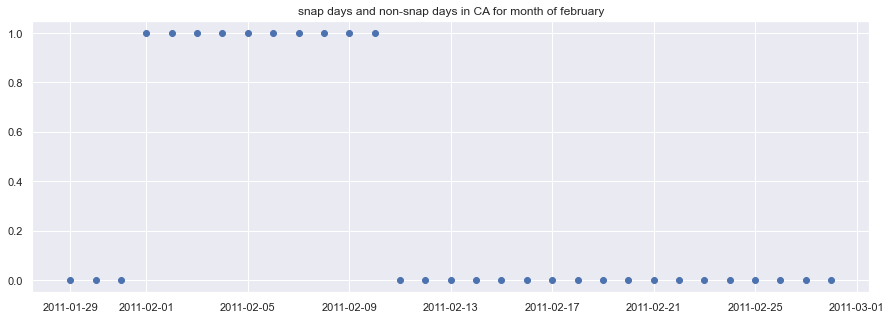

In [84]:
#visualizing snap days and non-snap days in CA for month of february
plt.figure(figsize=(15,5))
ind = calendar.date<'2011-03-01'
plt.scatter(calendar.date[ind],calendar.snap_CA[ind])
plt.title('snap days and non-snap days in CA for month of february');

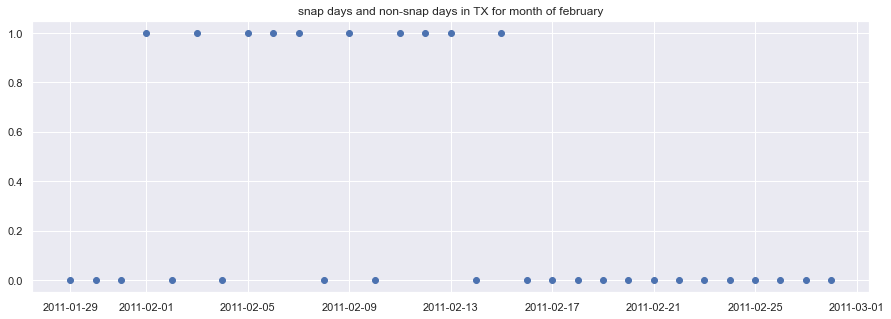

In [85]:
plt.figure(figsize=(15,5))
ind = calendar.date<'2011-03-01'
plt.scatter(calendar.date[ind],calendar.snap_TX[ind])
plt.title('snap days and non-snap days in TX for month of february');

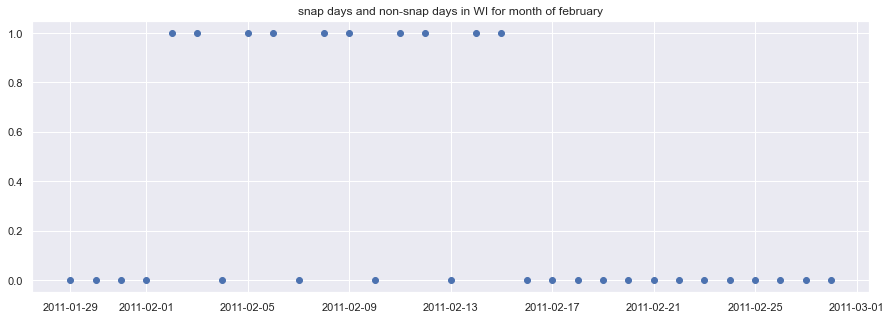

In [86]:
plt.figure(figsize=(15,5))
ind = calendar.date<'2011-03-01'
plt.scatter(calendar.date[ind],calendar.snap_WI[ind])
plt.title('snap days and non-snap days in WI for month of february');

From all the three scatter plots shown above, we obsereve the folowing:
* There are 10 snap days in each month for all the three US states.
* All 10 snap days are observed from the beginning of month to the middle of the month. 
* For state California, first 10 days of the month were fixed to be as snap days.
* For state Texas, snap days are observed at most 3 days in a row.
* For state Wisconsin, snap days were observed two days in a row after that one non-snap days is observed.


## Analysing *sell_price*

In [87]:
sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Above dataset represents weekly selling price of all 3049 items over all the 10 stores. 
> Some of the items were introduced later, so there is no record of there selling price in the beginning for some weeks. 

In [88]:
sell_price['category'] = sell_price['item_id'].apply(lambda x: x.split('_')[0])

In [89]:
sell_price['category']

0          HOBBIES
1          HOBBIES
2          HOBBIES
3          HOBBIES
4          HOBBIES
            ...   
6841116      FOODS
6841117      FOODS
6841118      FOODS
6841119      FOODS
6841120      FOODS
Name: category, Length: 6841121, dtype: object

In [90]:
temp = pd.DataFrame(sell_price.groupby(['category','wm_yr_wk'])['sell_price'].mean())

In [91]:
temp

sell_price
category  wm_yr_wk            
FOODS     11101       2.957808
          11102       2.994296
          11103       3.000411
          11104       3.001383
          11105       2.997777
...                        ...
HOUSEHOLD 11617       5.468602
          11618       5.468937
          11619       5.469915
          11620       5.472710
          11621       5.470810

[846 rows x 1 columns]

In [104]:
df = pd.DataFrame({'FOODS':temp['sell_price']['FOODS'],'HOBBIES':temp['sell_price']['HOBBIES'],
                   'HOUSEHOLD':temp['sell_price']['HOUSEHOLD'] })
df.head()

,FOODS,HOBBIES,HOUSEHOLD
wm_yr_wk,,,
11101,2.957808,4.671317,5.434950
11102,2.994296,4.676858,5.543891
11103,3.000411,4.620156,5.580149
11104,3.001383,4.593673,5.603164
11105,2.997777,4.585030,5.620323


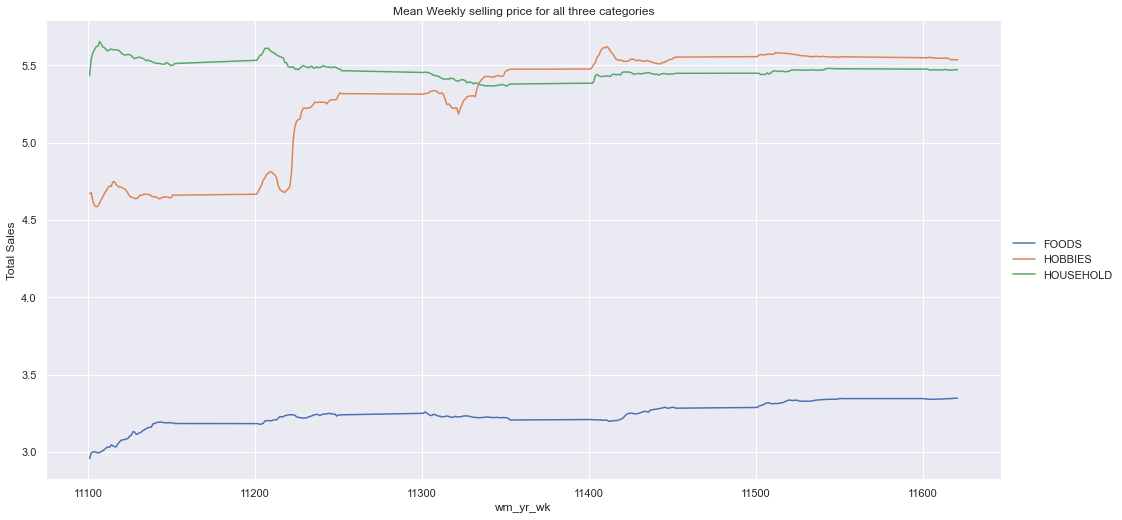

In [107]:
rel_plot(df,'Mean Weekly selling price for all three categories',xlabel='wm_yr_wk')

Average weekly selling price of items in FOOD category is quiet less(from 2.9 to 3.5) as compared to Hobbies and Household categories.<br>
After half of the year 2013 mean price of items in HOBBIES category is higher than items in HOUSEHOLD category, this can be because of a reason that certain items in Hobby category is introduce in the middle of 2013.

In [108]:
sell_price.groupby('store_id')['sell_price'].mean()

store_id
CA_1    4.414233
CA_2    4.445500
CA_3    4.388229
CA_4    4.421580
TX_1    4.374569
TX_2    4.366766
TX_3    4.387365
WI_1    4.457712
WI_2    4.441717
WI_3    4.418117
Name: sell_price, dtype: float64

Now I will move to the next section i.e feature engineering and modeling part. There I will pose this multi-step time series forecasting as supervised learning problem. But there are 3049 different time series corresponding to each item, and I cannot create one model for one time series(not a feasible option), rather I will cluster all items on certain common grounds and then create one model for items belonging in one cluster. 